# Import thư viện

In [4]:
# Cơ bản
import pandas as pd
import numpy as np
from collections import Counter
from itertools import product

# Vẽ biểu đồ
import matplotlib.pyplot as plt
import seaborn as sns

# Bỏ qua cảnh báo
import warnings
warnings.filterwarnings('ignore')

# Tiền xử lý
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, label_binarize, RobustScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.impute import KNNImputer, SimpleImputer
from imblearn.over_sampling import SMOTE

# Mô hình
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

# Đánh giá
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, roc_curve, auc, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import precision_recall_curve, average_precision_score

In [5]:
df = pd.read_csv('prudential.csv')

In [6]:
df.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8


In [7]:
df.shape

(59381, 128)

# Tiền xử lý

In [8]:
df.describe()

,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
count,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,...,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000
mean,39507.211515,1.026355,24.415655,0.328952,2.006955,2.673599,1.043583,0.405567,0.707283,0.292587,...,0.056954,0.010054,0.045536,0.010710,0.007528,0.013691,0.008488,0.019905,0.054496,5.636837
std,22815.883089,0.160191,5.072885,0.282562,0.083107,0.739103,0.291949,0.197190,0.074239,0.089037,...,0.231757,0.099764,0.208479,0.102937,0.086436,0.116207,0.091737,0.139676,0.226995,2.456833
min,2.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,19780.000000,1.000000,26.000000,0.076923,2.000000,3.000000,1.000000,0.238806,0.654545,0.225941,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,39487.000000,1.000000,26.000000,0.230769,2.000000,3.000000,1.000000,0.402985,0.709091,0.288703,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
75%,59211.000000,1.000000,26.000000,0.487179,2.000000,3.000000,1.000000,0.567164,0.763636,0.345188,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
max,79146.000000,2.000000,38.000000,1.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000


Response
8    19489
6    11233
7     8027
2     6552
1     6207
5     5432
4     1428
3     1013
Name: count, dtype: int64 

Response
8    32.82
6    18.92
7    13.52
2    11.03
1    10.45
5     9.15
4     2.40
3     1.71
Name: count, dtype: float64


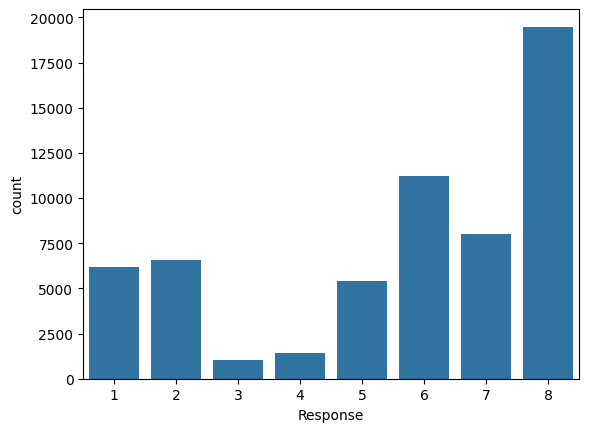

In [9]:
sns.countplot(x=df['Response'])
print(df['Response'].value_counts(), '\n')
print((df['Response'].value_counts() / len(df) * 100).round(2))

In [10]:
# Gộp nhãn
# 1, 2, 3 -> 1
# 4, 5, 6 -> 2
# 7, 8 -> 3
def map_response(label):
    if label in [1, 2, 3]:
        return 1
    elif label in [4, 5, 6]:
        return 2
    else:
        return 3

df['Response'] = df['Response'].apply(map_response)

Response
3    27516
2    18093
1    13772
Name: count, dtype: int64 

Response
3    46.34
2    30.47
1    23.19
Name: count, dtype: float64


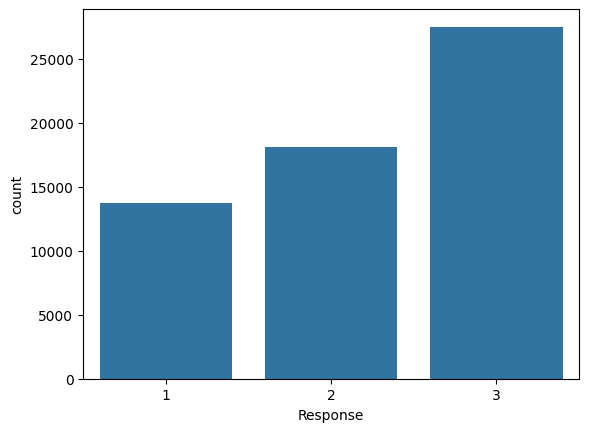

In [11]:
sns.countplot(x=df['Response'])
print(df['Response'].value_counts(), '\n')
print((df['Response'].value_counts() / len(df) * 100).round(2))

In [12]:
encoder = LabelEncoder()
df['Product_Info_2'] = encoder.fit_transform(df['Product_Info_2'])

In [13]:
df.drop(columns='Id', inplace=True)

In [14]:
df_null_cols = df.isnull().sum()[df.isnull().sum() > 0]
print(df_null_cols, '\n')
print((df_null_cols / len(df) * 100).round(2))

Employment_Info_1         19
Employment_Info_4       6779
Employment_Info_6      10854
Insurance_History_5    25396
Family_Hist_2          28656
Family_Hist_3          34241
Family_Hist_4          19184
Family_Hist_5          41811
Medical_History_1       8889
Medical_History_10     58824
Medical_History_15     44596
Medical_History_24     55580
Medical_History_32     58274
dtype: int64 

Employment_Info_1       0.03
Employment_Info_4      11.42
Employment_Info_6      18.28
Insurance_History_5    42.77
Family_Hist_2          48.26
Family_Hist_3          57.66
Family_Hist_4          32.31
Family_Hist_5          70.41
Medical_History_1      14.97
Medical_History_10     99.06
Medical_History_15     75.10
Medical_History_24     93.60
Medical_History_32     98.14
dtype: float64


In [15]:
# Loại bỏ các cột có tỉ lệ null >= 40%
df = df.loc[:, df.isnull().mean() < 0.4]

In [16]:
(df.isnull().sum()[df.isnull().sum() > 0] / len(df) * 100).round(2)

Employment_Info_1     0.03
Employment_Info_4    11.42
Employment_Info_6    18.28
Family_Hist_4        32.31
Medical_History_1    14.97
dtype: float64

# Phân loại cột thiếu

In [17]:
# Giá trị liên tục
con_cols = [
    'Employment_Info_1', 'Employment_Info_4', 'Employment_Info_6', 'Family_Hist_4'
]

In [18]:
# Giá trị rời rạc
dis_cols = [
    'Medical_History_1'
]

In [19]:
for cols in con_cols:
    print(df[cols].skew())

4.708551149022233
15.47991511648108
0.7868195795861598
0.20705197754257673


<Axes: xlabel='Employment_Info_6', ylabel='Count'>

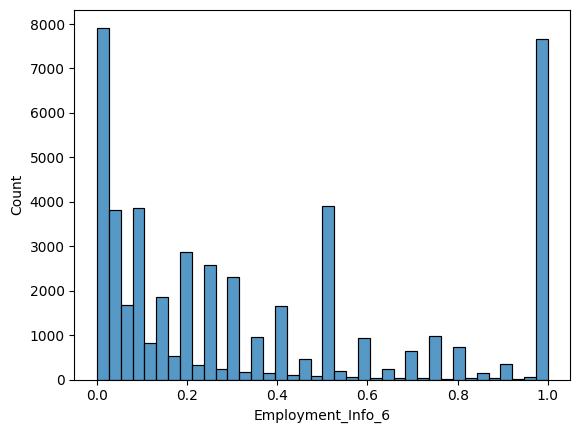

In [20]:
sns.histplot(x = df['Employment_Info_6'])

<Axes: xlabel='Family_Hist_4', ylabel='Count'>

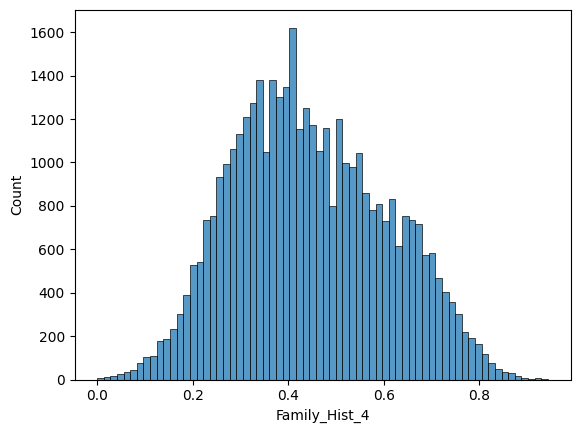

In [21]:
sns.histplot(x = df['Family_Hist_4'])

# Tách train test

In [22]:
X = df.drop(['Response'], axis=1)
y = df['Response']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

## Điền null

In [24]:
# Data cuối sau khi fill
X_train_filled = X_train.copy()
X_test_filled = X_test.copy()

# Fill từng nhóm nhãn (1, 2, 3)
for label_value in sorted(y_train.unique()):
    # Lọc theo nhãn
    group_train_idx = y_train[y_train == label_value].index
    group_train = X_train.loc[group_train_idx]

    # Fit + transform continous
    imputer_con = KNNImputer(n_neighbors=5)
    imputed_con = imputer_con.fit_transform(group_train[con_cols])
    X_train_filled.loc[group_train_idx, con_cols] = pd.DataFrame(
        imputed_con, columns=con_cols, index=group_train_idx
    )

    # Fit + transform discrete (round + int)
    imputer_dis = KNNImputer(n_neighbors=5)
    imputed_dis = imputer_dis.fit_transform(group_train[dis_cols])
    X_train_filled.loc[group_train_idx, dis_cols] = pd.DataFrame(
        imputed_dis, columns=dis_cols, index=group_train_idx
    ).round().astype(int)

# Với X_test thì dùng imputer theo nhãn train
for label_value in sorted(y_train.unique()):
    group_train_idx = y_train[y_train == label_value].index
    group_train_con = X_train.loc[group_train_idx, con_cols]
    group_train_dis = X_train.loc[group_train_idx, dis_cols]

    group_test_idx = y_test[y_test == label_value].index
    group_test_con = X_test.loc[group_test_idx, con_cols]
    group_test_dis = X_test.loc[group_test_idx, dis_cols]

    # Continous
    imputer_con = KNNImputer(n_neighbors=5)
    imputer_con.fit(group_train_con)
    imputed_con = imputer_con.transform(group_test_con)
    X_test_filled.loc[group_test_idx, con_cols] = pd.DataFrame(
        imputed_con, columns=con_cols, index=group_test_idx
    )

    # Discrete
    imputer_dis = KNNImputer(n_neighbors=5)
    imputer_dis.fit(group_train_dis)
    imputed_dis = imputer_dis.transform(group_test_dis)
    X_test_filled.loc[group_test_idx, dis_cols] = pd.DataFrame(
        imputed_dis, columns=dis_cols, index=group_test_idx
    ).round().astype(int)

In [25]:
print(X_train_filled.isnull().sum()[X_train_filled.isnull().sum() > 0])
print(X_test_filled.isnull().sum()[X_test_filled.isnull().sum() > 0])

Series([], dtype: int64)
Series([], dtype: int64)


In [26]:
X_train_filled.shape, X_test_filled.shape

((41566, 118), (17815, 118))

# Thuộc tính quan trọng theo Random Forest

In [27]:
rf = RandomForestClassifier()
rf.fit(X_train_filled, y_train)

RandomForestClassifier()

In [28]:
feature_importances = pd.DataFrame({
    'feature': X_train_filled.columns,
    'importance': rf.feature_importances_
}).sort_values(by='importance', ascending=False)

# Lọc các feature có độ quan trọng > 0

feat_imp = feature_importances.sort_values(by='importance', ascending=False)

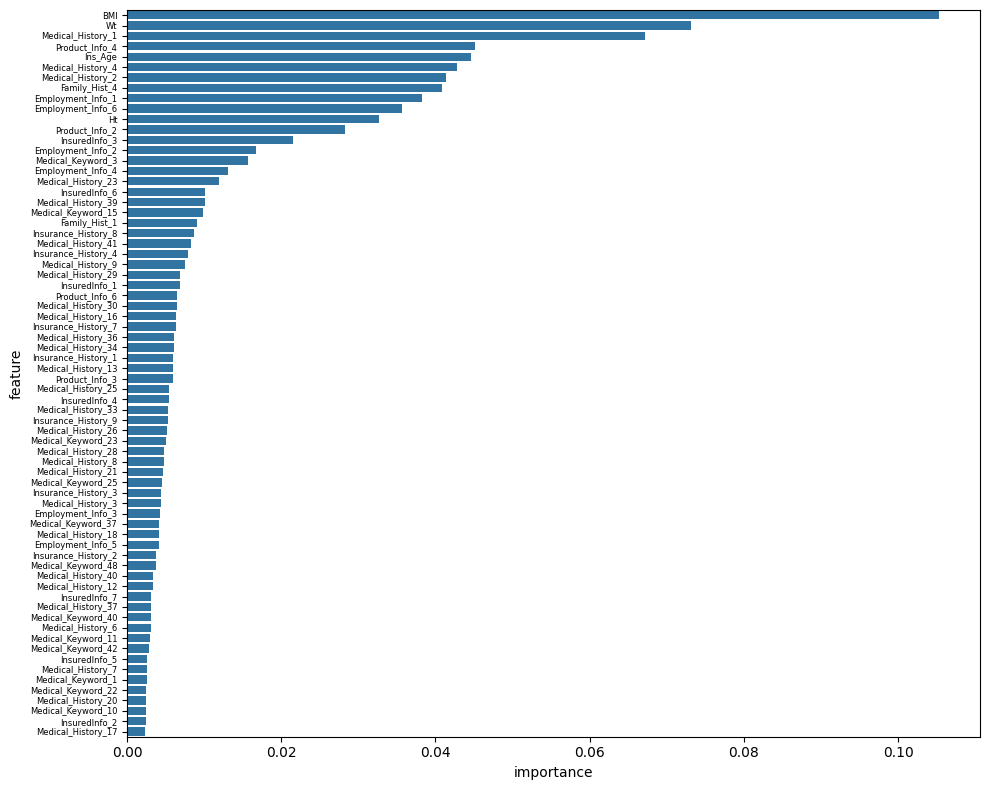

In [29]:
plt.figure(figsize=(10,8))
sns.barplot(data=feature_importances.head(70), x='importance', y='feature')
plt.tick_params(axis='y', labelsize=6)
plt.subplots_adjust(left=0.3) 
plt.tight_layout()
plt.show()

In [73]:
top = feat_imp.head(17)['feature'].tolist()
X_train_top = X_train_filled[top]
X_test_top = X_test_filled[top]

In [74]:
X_train_top.shape, X_test_top.shape

((41566, 17), (17815, 17))

In [75]:
X_train_top.columns

Index(['BMI', 'Wt', 'Medical_History_1', 'Product_Info_4', 'Ins_Age',
       'Medical_History_4', 'Medical_History_2', 'Family_Hist_4',
       'Employment_Info_1', 'Employment_Info_6', 'Ht', 'Product_Info_2',
       'InsuredInfo_3', 'Employment_Info_2', 'Medical_Keyword_3',
       'Employment_Info_4', 'Medical_History_23'],
      dtype='object')

# Chạy mô hình Decision Tree

In [76]:
def compute_inverse_class_weights(label_col):
    counter = Counter(label_col)
    total = sum(counter.values())
    
    class_freq = {cls: count / total for cls, count in counter.items()}
    
    max_freq = max(class_freq.values())
    class_weights = {cls: round(max_freq / freq, 2) for cls, freq in class_freq.items()}
    
    return class_weights

weights = compute_inverse_class_weights(y_train)
weights

{3: 1.0, 2: 1.52, 1: 2.0}

In [77]:
param = {
    'max_depth': [12],              
    'min_samples_split': [50], 
    'min_samples_leaf': [60],
    'criterion': ['gini'],
    'class_weight': [weights]
}

In [78]:
grid = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param,
    scoring='f1_macro',
    cv=5,                                                 
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train_top, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': [{1: 2.0, 2: 1.52, 3: 1.0}],
                         'criterion': ['gini'], 'max_depth': [12],
                         'min_samples_leaf': [60], 'min_samples_split': [50]},
             scoring='f1_macro', verbose=1)

In [79]:
grid.best_params_

{'class_weight': {3: 1.0, 2: 1.52, 1: 2.0},
 'criterion': 'gini',
 'max_depth': 12,
 'min_samples_leaf': 60,
 'min_samples_split': 50}

In [80]:
dt = grid.best_estimator_
y_proba = dt.predict_proba(X_test_top)
y_pred = dt.predict(X_test_top)

In [81]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.52      0.52      0.52      4132
           2       0.60      0.60      0.60      5428
           3       0.78      0.77      0.78      8255

    accuracy                           0.66     17815
   macro avg       0.63      0.63      0.63     17815
weighted avg       0.66      0.66      0.66     17815



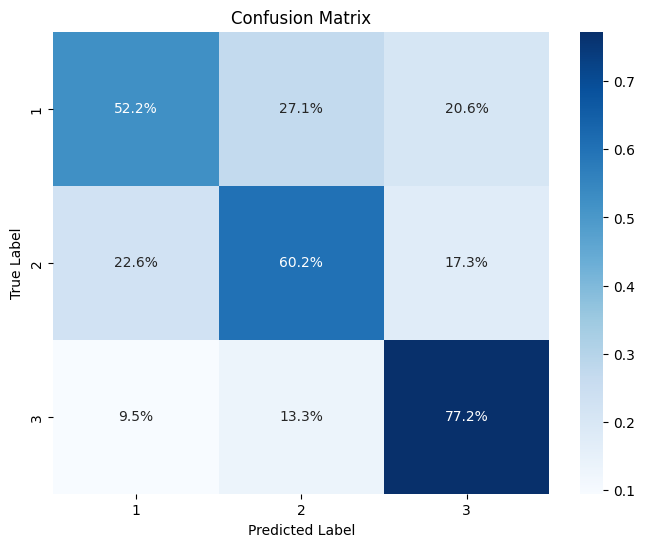

In [82]:
cm = confusion_matrix(y_test, y_pred, labels=[1,2,3])

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm_percentages = (cm_normalized * 100).round(2)
cm_annot = np.array([["{:.1f}%".format(val) for val in row] for row in cm_percentages])

plt.figure(figsize=(8,6))
sns.heatmap(cm_normalized, annot=cm_annot, fmt = 's', cmap='Blues', xticklabels=range(1,4), yticklabels=range(1,4))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

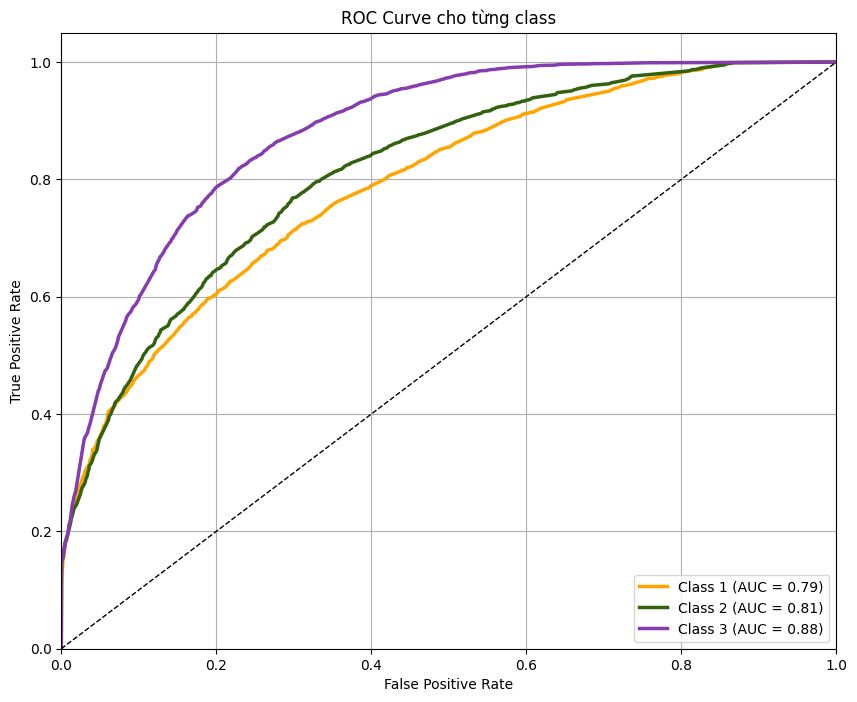

In [83]:
# Binarize true labels (nếu chưa làm ở trước)
y_true_bin = label_binarize(y_test, classes=[1, 2, 3])

fpr = dict()
tpr = dict()
roc_auc = dict()

n_classes = y_true_bin.shape[1]

# Tính FPR, TPR và AUC cho từng class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Màu sắc cho từng class
colors = {
    0: '#FFA500',  # Class 1 - Cam đậm
    1: '#32620E',  # Class 2 - Xanh lá đậm
    2: '#853CAF',  # Class 3 - Tím đậm
}

# Vẽ ROC curve
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i+1} (AUC = {roc_auc[i]:.2f})', color=colors[i], linewidth=2.5)

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve cho từng class')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Kiểm tra độ quan trọng sau khi huấn luyện

In [84]:
def check_importance(model, feature_names):
    importances = model.feature_importances_
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)
    
    # Lọc các feature có độ quan trọng > 0
    importance_df = importance_df[importance_df['Importance'] > 0]
    return importance_df
    
    print(importance_df)

check_importance(dt, X_train_top.columns)

,Feature,Importance
0,BMI,0.246892
2,Medical_History_1,0.220958
5,Medical_History_4,0.141713
6,Medical_History_2,0.129611
14,Medical_Keyword_3,0.063769
3,Product_Info_4,0.056683
4,Ins_Age,0.050751
1,Wt,0.019381
16,Medical_History_23,0.018937
7,Family_Hist_4,0.016626


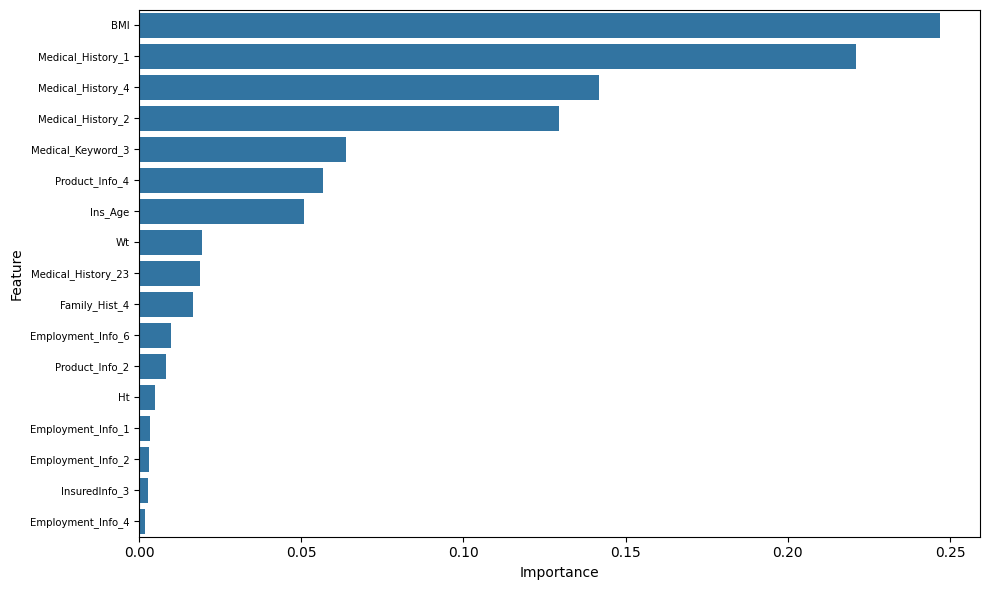

In [85]:
importance_df = check_importance(dt, X_train_top.columns)
plt.figure(figsize=(10,6))
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.tick_params(axis='y', labelsize=7.25)
plt.subplots_adjust(left=0.3) 
plt.tight_layout()
plt.show()